##### Title: Monitoring how RTT varies based on the geolocation of the target
##### Author: Lotito Davide Pio
##### Date: 
<img src="./images/logoUnipvST.jpg" width="75" height="75">

## Some useful imports

In [11]:
from matplotlib import pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import os
from glob import glob
import getCoordinate
import haversine as hs

## Read all files and create a unique dataframe 

In [12]:
dirPath = '../results/'
allFiles = glob(os.path.join(dirPath, "*.txt"))
indDf = (pd.read_json(f) for f in allFiles)
df = pd.concat(indDf, ignore_index=True)
df

,destination,date,time,packetLost,excutionTime,minRTT,avgRTT,maxRTT,devRTT
0,34.71.44.40,2022-04-18,17:36:02,0%,9011ms,126.428,128.174,131.034,1.442
1,35.236.81.238,2022-04-18,17:36:02,0%,9012ms,169.166,171.093,174.832,1.618
2,34.74.209.9,2022-04-18,17:36:02,0%,9011ms,116.353,118.043,122.192,1.730
3,34.151.215.105,2022-04-18,17:36:03,0%,9004ms,218.020,219.768,225.281,1.954
4,34.129.235.109,2022-04-18,17:36:03,0%,9002ms,293.776,296.078,301.445,2.572
5,34.85.87.24,2022-04-18,17:36:03,0%,9003ms,252.100,254.006,258.823,2.220
6,34.131.76.108,2022-04-18,17:36:03,0%,9001ms,274.038,276.124,281.453,2.431
7,34.101.215.255,2022-04-18,17:36:03,0%,9000ms,264.622,266.643,271.948,2.467
8,34.88.168.220,2022-04-18,17:36:02,0%,9012ms,53.281,55.857,60.843,2.351
9,34.65.88.164,2022-04-18,17:36:02,0%,9012ms,17.602,20.080,24.858,2.625


## Sort in ascending order by RTT

In [13]:
#df.sort_values('avgRTT')

## Coordinate degli IP

In [26]:
IP_list = df['destination'].tolist()
IP_list = list(dict.fromkeys(IP_list)) #remove duplicated elements

## Plottare posizione sulla mappa degli IP

My IP is: 34.71.44.40 and my coordinates are POINT (-97.822 37.751)
My IP is: 35.236.81.238 and my coordinates are POINT (-118.244 34.0544)
My IP is: 34.74.209.9 and my coordinates are POINT (-79.9746 32.8608)
My IP is: 34.151.215.105 and my coordinates are POINT (-46 -23)
My IP is: 34.129.235.109 and my coordinates are POINT (144 -37)
My IP is: 34.85.87.24 and my coordinates are POINT (139.7458 35.6865)
My IP is: 34.131.76.108 and my coordinates are POINT (77 28)
My IP is: 34.101.215.255 and my coordinates are POINT (106.8296 -6.1741)
My IP is: 34.88.168.220 and my coordinates are POINT (28.1733 61.0681)
My IP is: 34.65.88.164 and my coordinates are POINT (8.5394 47.3624)


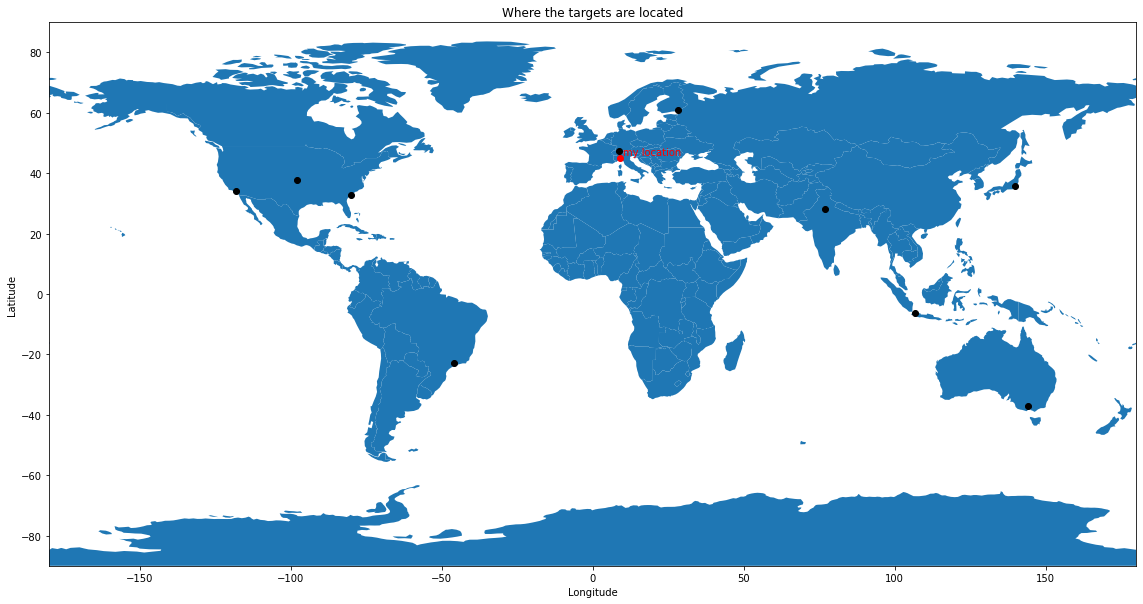

In [32]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

points = gpd.GeoDataFrame() # Point(longitudine, latitudine)

my_points = {}
for ip in IP_list:
    point = Point(getCoordinate.coordinates(ip))
    os.system("sleep 1")# wait because of the free-API
    #my_points.append(point)
    my_points[ip] = point

# API does not get
my_points["34.151.215.105"] = (Point(-46,-23))
my_points["34.129.235.109"] = (Point(144,-37))
my_points["34.131.76.108"] = (Point(77,28))

for ip, loc in my_points.items():
    print(f"My IP is: {ip} and my coordinates are {loc}")

points["geometry"] = gpd.GeoSeries(my_points)
ax = world.plot()
points.plot(color="k", ax=ax)

my_point = Point(9, 45)
my_location = gpd.GeoSeries(my_point)
my_location.plot(color="r", ax=ax)

plt.text(my_point.x+1,my_point.y+1,"my location", color='red')
plt.rcParams["figure.figsize"] = (25, 10)
plt.title("Where the targets are located")
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


## Calcolare distanza tra la mia posizione e IP target

In [33]:
distances = []
for p in my_points.values():
    d = hs.haversine((my_point.y, my_point.x),(p.y, p.x)) #lat, long
    distances.append(d)

In [34]:
df = df.assign(distance=distances)
df

,destination,date,time,packetLost,excutionTime,minRTT,avgRTT,maxRTT,devRTT,distance
0,34.71.44.40,2022-04-18,17:36:02,0%,9011ms,126.428,128.174,131.034,1.442,8258.414178
1,35.236.81.238,2022-04-18,17:36:02,0%,9012ms,169.166,171.093,174.832,1.618,9743.674491
2,34.74.209.9,2022-04-18,17:36:02,0%,9011ms,116.353,118.043,122.192,1.730,7425.311469
3,34.151.215.105,2022-04-18,17:36:03,0%,9004ms,218.020,219.768,225.281,1.954,9388.279066
4,34.129.235.109,2022-04-18,17:36:03,0%,9002ms,293.776,296.078,301.445,2.572,16187.205013
5,34.85.87.24,2022-04-18,17:36:03,0%,9003ms,252.100,254.006,258.823,2.220,9767.791442
6,34.131.76.108,2022-04-18,17:36:03,0%,9001ms,274.038,276.124,281.453,2.431,6175.643452
7,34.101.215.255,2022-04-18,17:36:03,0%,9000ms,264.622,266.643,271.948,2.467,11107.669236
8,34.88.168.220,2022-04-18,17:36:02,0%,9012ms,53.281,55.857,60.843,2.351,2181.307156
9,34.65.88.164,2022-04-18,17:36:02,0%,9012ms,17.602,20.080,24.858,2.625,265.068544


## Ordinare per distanza minore

In [35]:
df.sort_values('distance')

,destination,date,time,packetLost,excutionTime,minRTT,avgRTT,maxRTT,devRTT,distance
9,34.65.88.164,2022-04-18,17:36:02,0%,9012ms,17.602,20.080,24.858,2.625,265.068544
8,34.88.168.220,2022-04-18,17:36:02,0%,9012ms,53.281,55.857,60.843,2.351,2181.307156
6,34.131.76.108,2022-04-18,17:36:03,0%,9001ms,274.038,276.124,281.453,2.431,6175.643452
2,34.74.209.9,2022-04-18,17:36:02,0%,9011ms,116.353,118.043,122.192,1.730,7425.311469
0,34.71.44.40,2022-04-18,17:36:02,0%,9011ms,126.428,128.174,131.034,1.442,8258.414178
3,34.151.215.105,2022-04-18,17:36:03,0%,9004ms,218.020,219.768,225.281,1.954,9388.279066
1,35.236.81.238,2022-04-18,17:36:02,0%,9012ms,169.166,171.093,174.832,1.618,9743.674491
5,34.85.87.24,2022-04-18,17:36:03,0%,9003ms,252.100,254.006,258.823,2.220,9767.791442
7,34.101.215.255,2022-04-18,17:36:03,0%,9000ms,264.622,266.643,271.948,2.467,11107.669236
4,34.129.235.109,2022-04-18,17:36:03,0%,9002ms,293.776,296.078,301.445,2.572,16187.205013


## Grafici

A parità di destinazione IP si calcola la media, della media, dell' RTT. Poi se ne fa il grafico

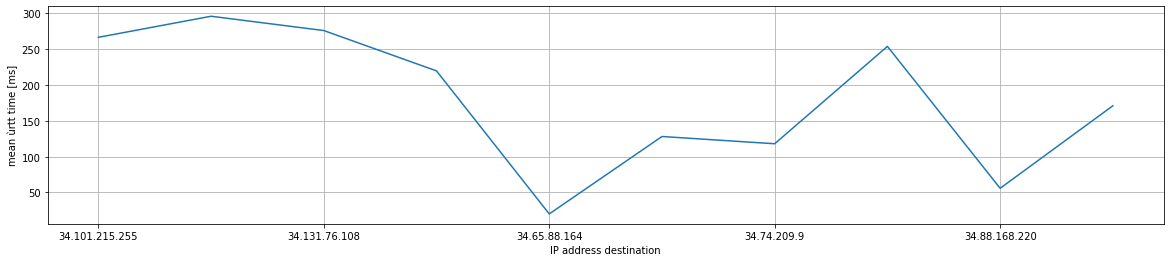

In [61]:
df.groupby("destination").avgRTT.mean().plot()
plt.xlabel("IP address destination")
plt.ylabel("mean ùrtt time [ms]")
plt.rcParams["figure.figsize"] = (20, 4)
plt.grid()

Si mostrano i valori di RTT raggruppati per IP 

Text(0, 0.5, 'rtt time [ms]')

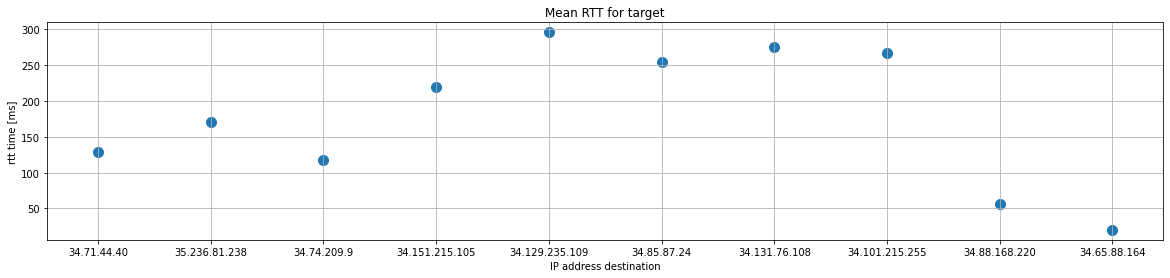

In [59]:
df.plot.scatter(x = 'destination', y = 'avgRTT', s = 100)
plt.grid()
plt.rcParams["figure.figsize"] = (20, 4)
plt.title("Mean RTT for target")
plt.xlabel("IP address destination")
plt.ylabel("rtt time [ms]")

Mostrare come con il crescere della distanza, cresca anche l'RTT (o almeno così dovrebbe accadere)

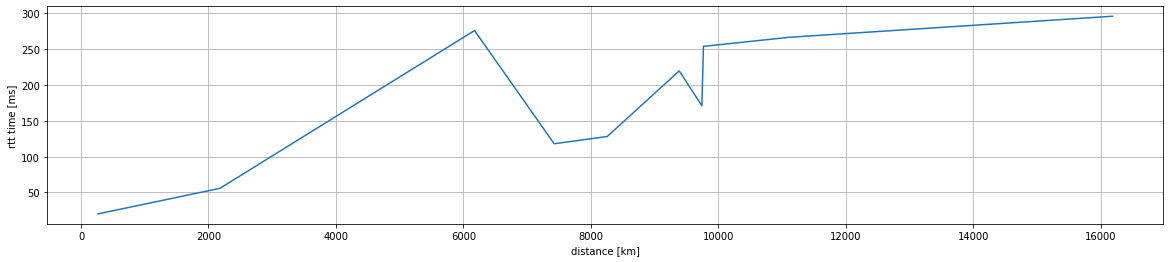

In [62]:
df.groupby("distance").avgRTT.mean().plot()
plt.xlabel("distance [km]")
plt.ylabel("rtt time [ms]")
plt.grid()
plt.rcParams["figure.figsize"] = (14, 7)
# df.plot.scatter(x = 'distance', y = 'avgRTT', s = 100)
# plt.title("How RTT change with distance")
# plt.xlabel("distance [km]")
# plt.ylabel("rtt time [ms]")